In [1]:
from netCDF4 import Dataset
import datetime
import matplotlib
import pandas as pd
import os
import numpy as np
from scipy.signal import argrelextrema
import pickle
from ll_xy import lonlat_to_xy
import warnings
import matplotlib.pyplot as plt
import kuka_tools as kt
# You can find kuka_tools at https://github.com/robbiemallett/custom_modules/blob/master/kuka_tools.py

/tmp/ipykernel_3793/2020648458.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
directory = '/media/robbie/One Touch/KUKA/PROCESSED/20231003'

pits = {}

Text(0, 0.5, 'y distance (m)')

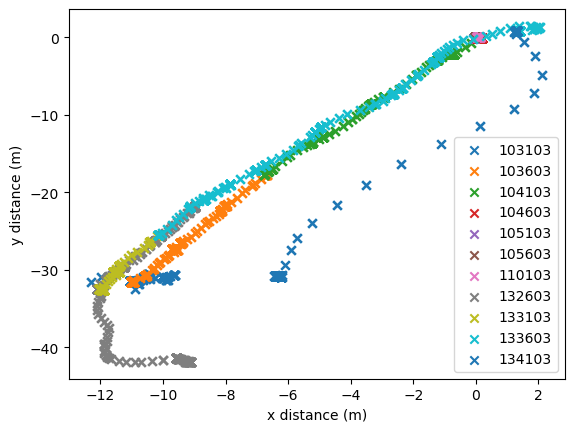

In [3]:
x0,y0 = 0,0

def plot_pos(file,plot=True,x0=0,y0=0):
    
    d = Dataset(f'{directory}/{file}')
    x, y = kt.lonlat_to_xy(np.array(d['lon']), np.array(d['lat']),hemisphere='s')
    y = y[np.abs(x)>10_000] -y0
    x = x[np.abs(x)>10_000] -x0
    if plot:
        plt.scatter(x,y,marker='x',label=file[-9:-3])

    return (x,y)

x,y=plot_pos('kuka_stare_decon_Ka-Scat20231003-105603.nc',plot=False)

x0 = x[0]; y0 = y[0]


plot_pos('kuka_stare_decon_Ka-Scat20231003-103103.nc',x0=x0,y0=y0)
plot_pos('kuka_stare_decon_Ka-Scat20231003-103603.nc',x0=x0,y0=y0)
plot_pos('kuka_stare_decon_Ka-Scat20231003-104103.nc',x0=x0,y0=y0)
plot_pos('kuka_stare_decon_Ka-Scat20231003-104603.nc',x0=x0,y0=y0)
plot_pos('kuka_stare_decon_Ka-Scat20231003-105103.nc',x0=x0,y0=y0)
plot_pos('kuka_stare_decon_Ka-Scat20231003-105603.nc',x0=x0,y0=y0)
plot_pos('kuka_stare_decon_Ka-Scat20231003-110103.nc',x0=x0,y0=y0)
plot_pos('kuka_stare_decon_Ka-Scat20231003-132603.nc',x0=x0,y0=y0)
plot_pos('kuka_stare_decon_Ka-Scat20231003-133103.nc',x0=x0,y0=y0)
plot_pos('kuka_stare_decon_Ka-Scat20231003-133603.nc',x0=x0,y0=y0)
plot_pos('kuka_stare_decon_Ka-Scat20231003-134103.nc',x0=x0,y0=y0)

plt.legend()
plt.xlabel('x distance (m)')
plt.ylabel('y distance (m)')

# plt.xlim(-20,5)
# plt.ylim(-20,5)

Text(0, 0.5, 'y distance (m)')

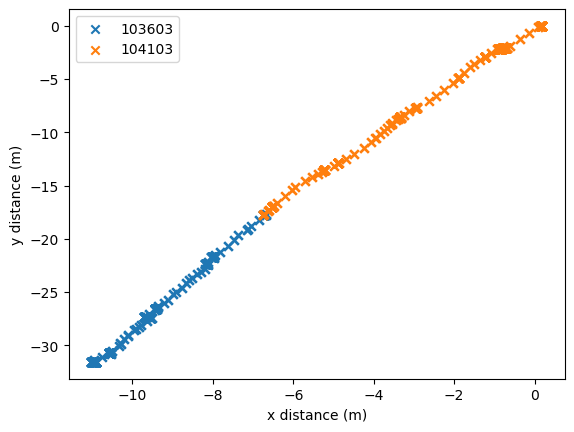

In [4]:
x0,y0 = 0,0

def plot_pos(file,plot=True,x0=0,y0=0):
    
    d = Dataset(f'{directory}/{file}')
    x, y = kt.lonlat_to_xy(np.array(d['lon']), np.array(d['lat']),hemisphere='s')
    y = y[np.abs(x)>10_000] -y0
    x = x[np.abs(x)>10_000] -x0
    if plot:
        plt.scatter(x,y,marker='x',label=file[-9:-3])

    return (x,y)

x,y=plot_pos('kuka_stare_decon_Ka-Scat20231003-105603.nc',plot=False)

x0 = x[0]; y0 = y[0]


# plot_pos('kuka_stare_decon_Ka-Scat20231003-103103.nc',x0=x0,y0=y0)
plot_pos('kuka_stare_decon_Ka-Scat20231003-103603.nc',x0=x0,y0=y0)
plot_pos('kuka_stare_decon_Ka-Scat20231003-104103.nc',x0=x0,y0=y0)
# plot_pos('kuka_stare_decon_Ka-Scat20231003-104603.nc',x0=x0,y0=y0)
# plot_pos('kuka_stare_decon_Ka-Scat20231003-105103.nc',x0=x0,y0=y0)
# plot_pos('kuka_stare_decon_Ka-Scat20231003-105603.nc',x0=x0,y0=y0)
# plot_pos('kuka_stare_decon_Ka-Scat20231003-110103.nc',x0=x0,y0=y0)
# plot_pos('kuka_stare_decon_Ka-Scat20231003-132603.nc',x0=x0,y0=y0)
# plot_pos('kuka_stare_decon_Ka-Scat20231003-133103.nc',x0=x0,y0=y0)
# plot_pos('kuka_stare_decon_Ka-Scat20231003-133603.nc',x0=x0,y0=y0)
# plot_pos('kuka_stare_decon_Ka-Scat20231003-134103.nc',x0=x0,y0=y0)

plt.legend()
plt.xlabel('x distance (m)')
plt.ylabel('y distance (m)')

# plt.xlim(-20,5)
# plt.ylim(-20,5)

In [5]:
pits = {}

In [6]:
# # Offset between Ka & ku
fa = 'kuka_stare_decon_Ka-Scat20231003-103603.nc'

fu = 'kuka_stare_decon_Ku-Scat20231003-103408.nc'

ka = Dataset(f'{directory}/{fa}')['start_time'][0]
ku = Dataset(f'{directory}/{fu}')['start_time'][0]
ka-ku

114.80712795257568

datetime.timedelta(seconds=10311)

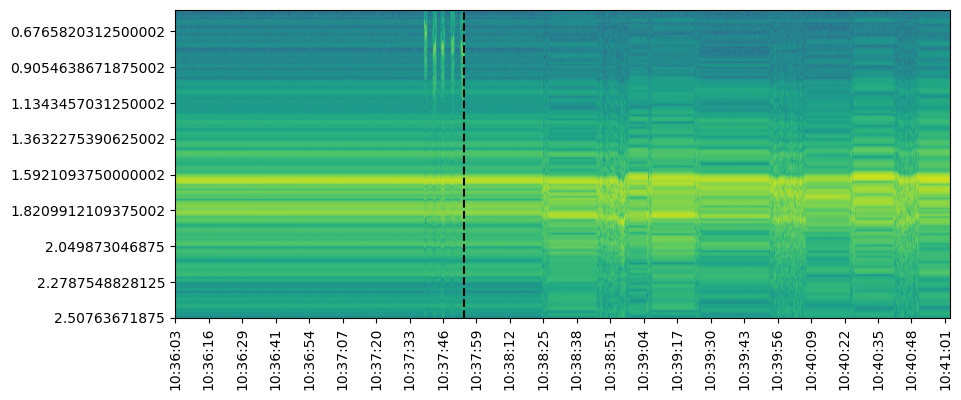

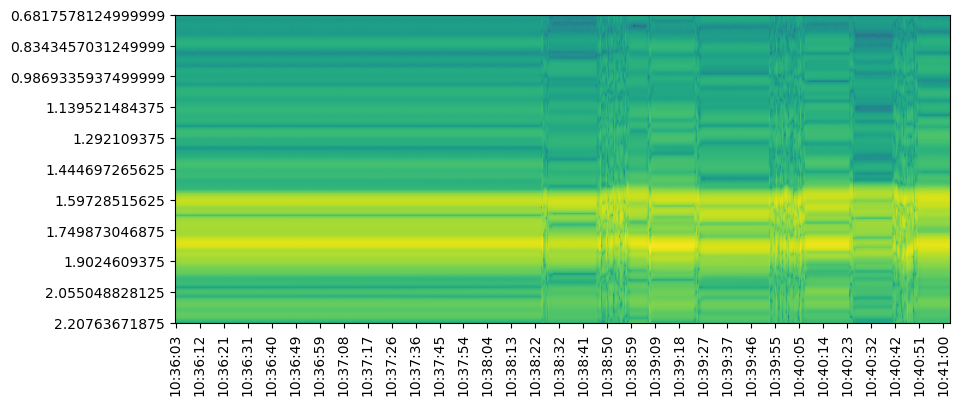

In [7]:
fa = 'kuka_stare_decon_Ka-Scat20231003-103603.nc'

fu = 'kuka_stare_decon_Ku-Scat20231003-103408.nc'

time_addition = datetime.timedelta(seconds=0)

ka_times = [(37,55)]
vlines = [datetime.datetime(2023,10,3,10,a,b)+time_addition for (a,b) in ka_times]
            # (30,30), (31,12)

kt.plot_file(fa,'ka',time_offset_s=0,vlines = vlines,directory=directory)

ku_times = []
vlines = [datetime.datetime(2023,10,2,11,a,b)+time_addition for (a,b) in ku_times]

kt.plot_file(fu,'ku',time_offset_s=-0+115,vlines=vlines,directory=directory)

# Voice recording indicates that 10:37:55 kuka time is equal to 07:46:04 on phone

local_delta = datetime.datetime(2023,10,3,10,37,55)-datetime.datetime(2023,10,3,7,46,4)
local_delta

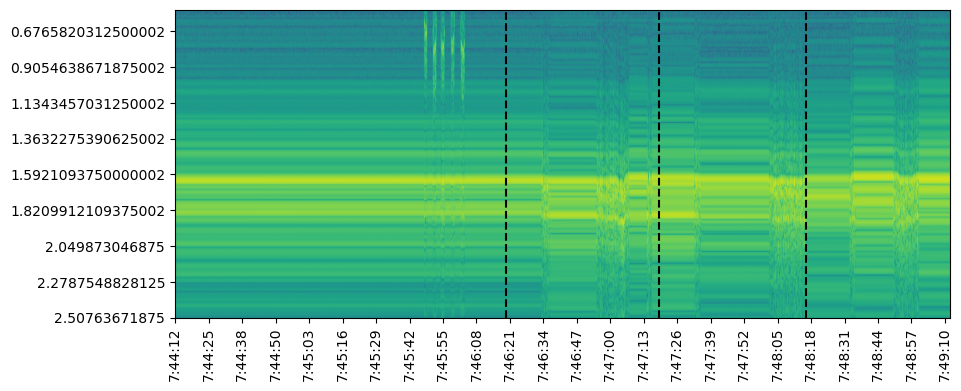

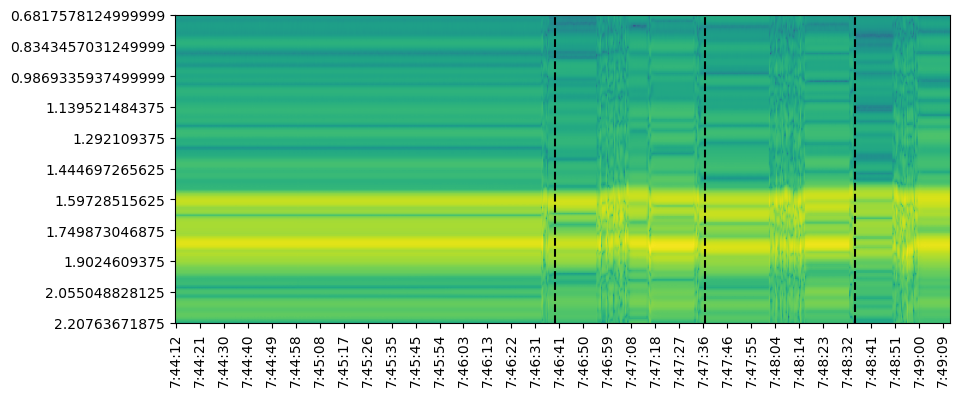

In [22]:
fa = 'kuka_stare_decon_Ka-Scat20231003-103603.nc'

fu = 'kuka_stare_decon_Ku-Scat20231003-103408.nc'

time_addition = datetime.timedelta(seconds=0)

ka_times = [(46,20),(47,19),(48,16)]
vlines = [datetime.datetime(2023,10,3,7,a,b)+time_addition for (a,b) in ka_times]
            # (30,30), (31,12)

ka_inds = kt.plot_file(fa,'ka',time_offset_s=-local_delta.seconds,vlines = vlines,directory=directory)

ku_times = [(46,39),(47,37),(48,35)]
vlines = [datetime.datetime(2023,10,3,7,a,b)+time_addition for (a,b) in ku_times]

ku_inds = kt.plot_file(fu,'ku',time_offset_s=-local_delta.seconds+115,vlines=vlines,directory=directory)

pit_numbers = [1,2,3]


ku_files = [fu]*len(pit_numbers)
ka_files = [fa]*len(pit_numbers)


for pitno, ka_ind, ku_ind, ka_file, ku_file in zip(pit_numbers,ka_inds,ku_inds,ka_files,ku_files):

    pits[pitno] = {}
    pits[pitno]['ka'] = ka_ind
    pits[pitno]['ku'] = ku_ind
    pits[pitno]['ka_file'] = ka_file
    pits[pitno]['ku_file'] = ku_file

In [21]:
# Special case of loc 4 as the ka & ku straddle the files:

pits[4] = {'ku':16,'ka':1112,
           'ku_file':'kuka_stare_decon_Ku-Scat20231003-103908.nc',
           'ka_file':'kuka_stare_decon_Ka-Scat20231003-103603.nc',
          }

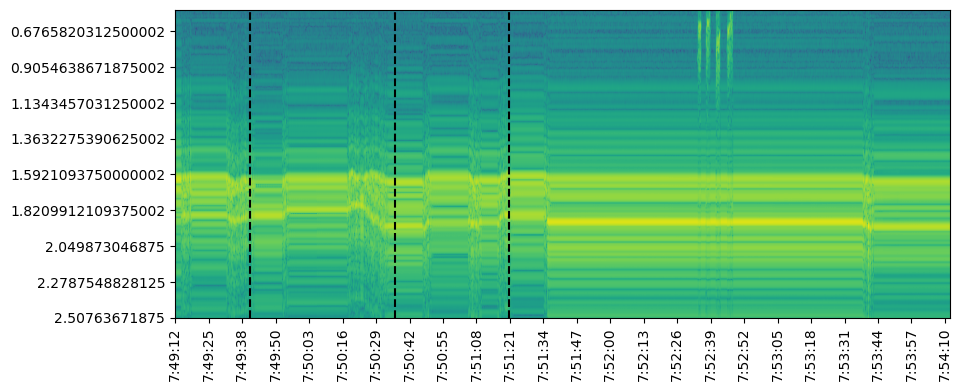

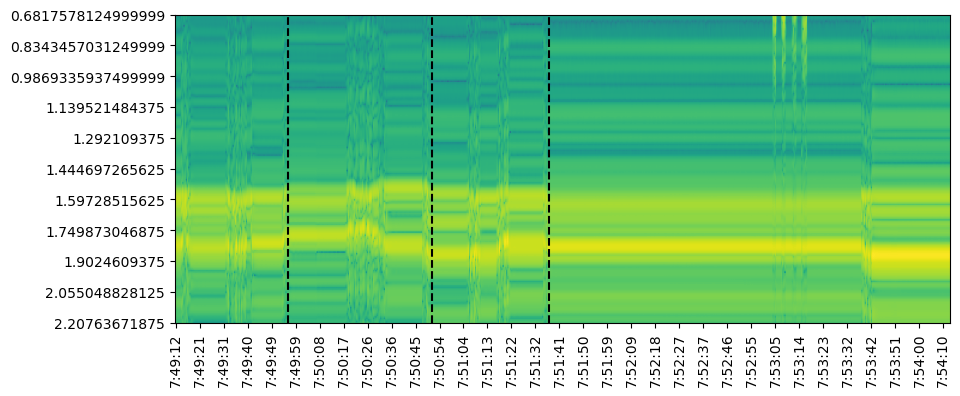

In [24]:
fa = 'kuka_stare_decon_Ka-Scat20231003-104103.nc'

fu = 'kuka_stare_decon_Ku-Scat20231003-103908.nc'

time_addition = datetime.timedelta(seconds=0)

ka_times = [(49,41),(50,37),(51,21)]
vlines = [datetime.datetime(2023,10,3,7,a,b)+time_addition for (a,b) in ka_times]
            # (30,30), (31,12)

ka_inds = kt.plot_file(fa,'ka',time_offset_s=-local_delta.seconds,vlines = vlines,directory=directory)

ku_times = [(49,56),(50,52),(51,37)]
vlines = [datetime.datetime(2023,10,3,7,a,b)+time_addition for (a,b) in ku_times]

ku_inds = kt.plot_file(fu,'ku',time_offset_s=-local_delta.seconds+115,vlines=vlines,directory=directory)

pit_numbers = [5,6,7]


ku_files = [fu]*len(pit_numbers)
ka_files = [fa]*len(pit_numbers)


for pitno, ka_ind, ku_ind, ka_file, ku_file in zip(pit_numbers,ka_inds,ku_inds,ka_files,ku_files):

    pits[pitno] = {}
    pits[pitno]['ka'] = ka_ind
    pits[pitno]['ku'] = ku_ind
    pits[pitno]['ka_file'] = ka_file
    pits[pitno]['ku_file'] = ku_file

In [26]:
pols = ['hh','vv','hv','vh']

for pitno, data_dict in pits.items():

    y,m,day = kt.get_ymd_from_filename(pits[pitno]['ku_file'])
    
    for freq in ['ka','ku']:

        with Dataset(f'{directory}/{data_dict[f"{freq}_file"]}') as d:
            
            ranges = np.array(d['range'])

            start_ind = pits[pitno][freq]
            end_ind = start_ind+5

            for pol in pols:
            
                pits[pitno][f'{freq}_{pol}'] = np.mean(np.array(d[f'{pol}_power_decon0'])[:,start_ind:start_ind+5],axis=1)
                pits[pitno][f'{freq}_range'] = ranges

In [27]:
for freq in ['ka','ku']:

    for h in pits.keys():
    
        data = pits[h]
    
        dic = {pol:data[f'{freq}_{pol}'] for pol in pols}
        
        wvfms = pd.DataFrame(dic)
    
        wvfms.to_csv(f'../data/waveforms/Hangar_2023103_a_{h}_{freq}.csv')